In [14]:
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
%matplotlib inline

In [15]:
df = pd.read_csv("income.csv")
df.head()

,income,age,sex
0,10,84.222,0
1,20,69.783,0
2,30,69.408,0
3,40,66.148,0
4,50,76.315,0


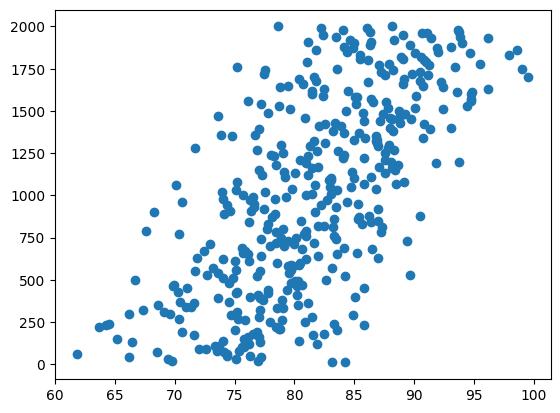

In [16]:
plt.scatter(df['age'],df['income'])

In [17]:
km = KMeans(n_clusters=3)
km

KMeans(n_clusters=3)

In [18]:
y_predicted = km.fit_predict(df[['age','income']])
y_predicted

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,

In [19]:
df['cluster'] = y_predicted
df.head()

,income,age,sex,cluster
0,10,84.222,0,1
1,20,69.783,0,1
2,30,69.408,0,1
3,40,66.148,0,1
4,50,76.315,0,1


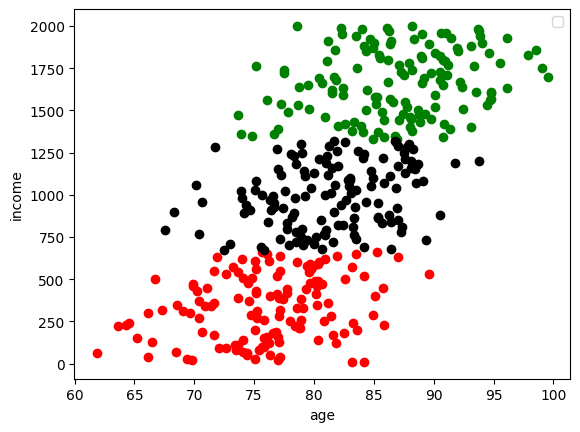

In [20]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]

plt.scatter(df1.age,df1['income'],color='green')
plt.scatter(df2.age,df2['income'],color='red')
plt.scatter(df3.age,df3['income'],color='black')

plt.xlabel('age')
plt.ylabel('income')
plt.legend()

In [25]:
km.cluster_centers_

array([[  76.13396212,  335.        ],
       [  86.95072794, 1665.        ],
       [  81.34701515,  995.        ]])

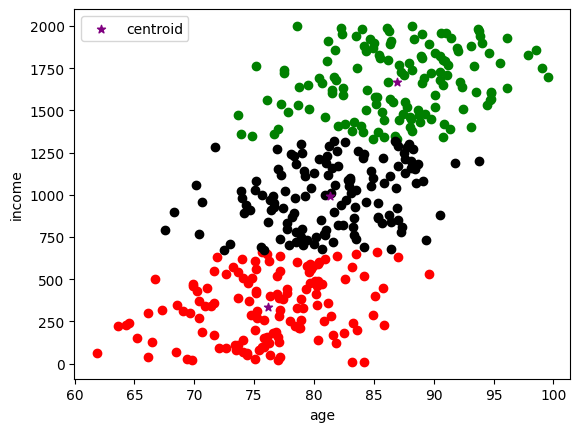

In [26]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]
plt.scatter(df1.age,df1['income'],color='green')
plt.scatter(df2.age,df2['income'],color='red')
plt.scatter(df3.age,df3['income'],color='black')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.xlabel('age')
plt.ylabel('income')
plt.legend()

In [ ]:
k_rng = range(1,10)
sse = []
for k in k_rng:
  km = KMeans(n_clusters=k)
  km.fit(df[['age','income']])
  sse.append(km.inertia_)

In [28]:
sse

[133349136.95092559,
 33344859.76760824,
 14833343.452360673,
 8352147.923715052,
 5373422.541003196,
 3717385.7915063496,
 2734404.5067245318,
 2098027.727525049,
 1659335.3019026518]

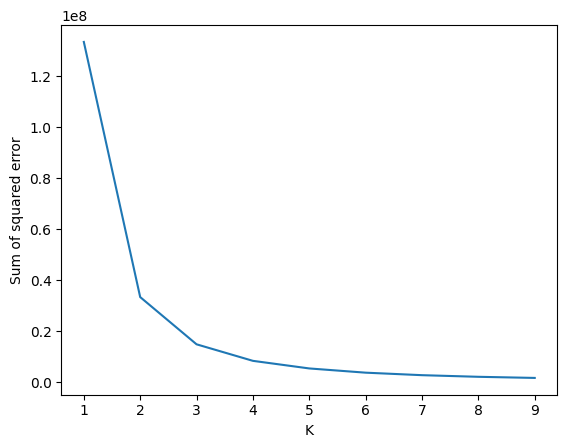

In [29]:
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)